In [2]:
import numpy as np 
import seaborn as sns 
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import shapely
from shapely import wkt
from shapely.geometry import MultiPolygon, Polygon

In [3]:
drought_df =  pd.read_csv("drought_conditions_8_2022 - Drought_Conditions_August_2022 (2).csv")


drought_df.head()

,FID,Unnamed: 1,longitude,latitude,Drought,area_km2,area_ha
0,Drought Conditions August 2022,NaN,41.926704,1.161922,severe,36.47425,3647.42491
1,NaN,NaN,41.922600,1.162887,severe,36.47425,3647.42491
2,NaN,NaN,41.918930,1.161548,severe,36.47425,3647.42491
3,NaN,NaN,41.916382,1.158357,severe,36.47425,3647.42491
4,NaN,NaN,41.916813,1.156054,severe,36.47425,3647.42491


In [4]:
print(drought_df.columns)

Index(['FID', 'Unnamed: 1', 'longitude', 'latitude', 'Drought', 'area_km2',
       'area_ha'],
      dtype='object')


In [5]:
from shapely.geometry import MultiPolygon, Polygon

In [6]:
from mpl_toolkits.basemap import Basemap

In [7]:
drought = drought_df["Drought"]

In [8]:
import os
import tarfile
from six.moves import urllib

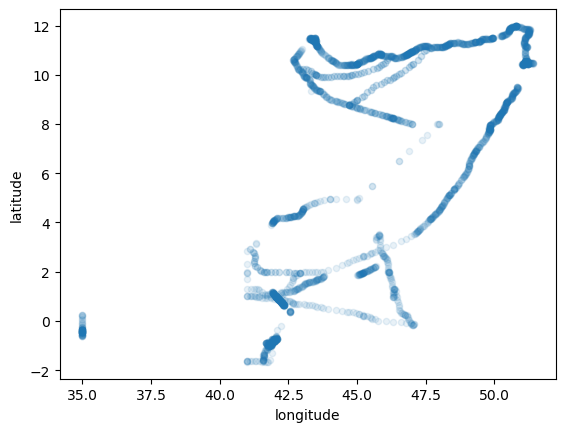

<Figure size 5000x4000 with 0 Axes>

In [9]:
drought_df.plot(kind="scatter", x="longitude" , y="latitude", alpha=0.1 )
plt.figure(figsize=(50,40))

                  
plt.show()

In [10]:
for col in [
    'FID',
    'Unnamed: 1'
]:
    drought_df[col] = drought_df[col].astype(str).str.replace('NaN','')
    drought_df[col] = pd.to_numeric(drought_df[col], errors= 'coerce').fillna(0)

In [11]:
drought_df.columns

Index(['FID', 'Unnamed: 1', 'longitude', 'latitude', 'Drought', 'area_km2',
       'area_ha'],
      dtype='object')

In [12]:
drought_df.head()

,FID,Unnamed: 1,longitude,latitude,Drought,area_km2,area_ha
0,0.0,0.0,41.926704,1.161922,severe,36.47425,3647.42491
1,0.0,0.0,41.922600,1.162887,severe,36.47425,3647.42491
2,0.0,0.0,41.918930,1.161548,severe,36.47425,3647.42491
3,0.0,0.0,41.916382,1.158357,severe,36.47425,3647.42491
4,0.0,0.0,41.916813,1.156054,severe,36.47425,3647.42491


In [13]:
print(drought_df['Drought'].unique())


['severe' 'extreme' 'moderate' 'mild']


In [14]:
drought_df['Drought'] = drought_df['Drought'].astype(str).str.lower().str.strip()


In [15]:
data = {
    'Region': ['Awdal', 'Bakool', 'Banadir', 'Bari','Bay','Galgaduud','Gedo','Hiraan','Mudug','Nugaal','Sanaag','Sool','Togdheer','Woqooyi Galbeed','Middle Shabelle','Lower Shabelle','Middle Juba','Lower Juba'],
    'Latitude': [10.8005, 4.3412, 2.1167, 11.1578,3.0713,5.0000,2.4362,4.0000,6.1078,8.4000,10.7167,8.6667,9.4461,9.9333,3.0000, 1.8766,2.0780,0.2240],
    'Longitude': [43.3512, 43.5432, 45.4000, 48.2000,43.8345,47.0000,41.4838,45.5000,47.9862,48.5000,48.3333,47.5000,45.2994,43.2000,45.5000,44.2479,41.6012,41.6012]
    
}
regions_df = pd.DataFrame(data)

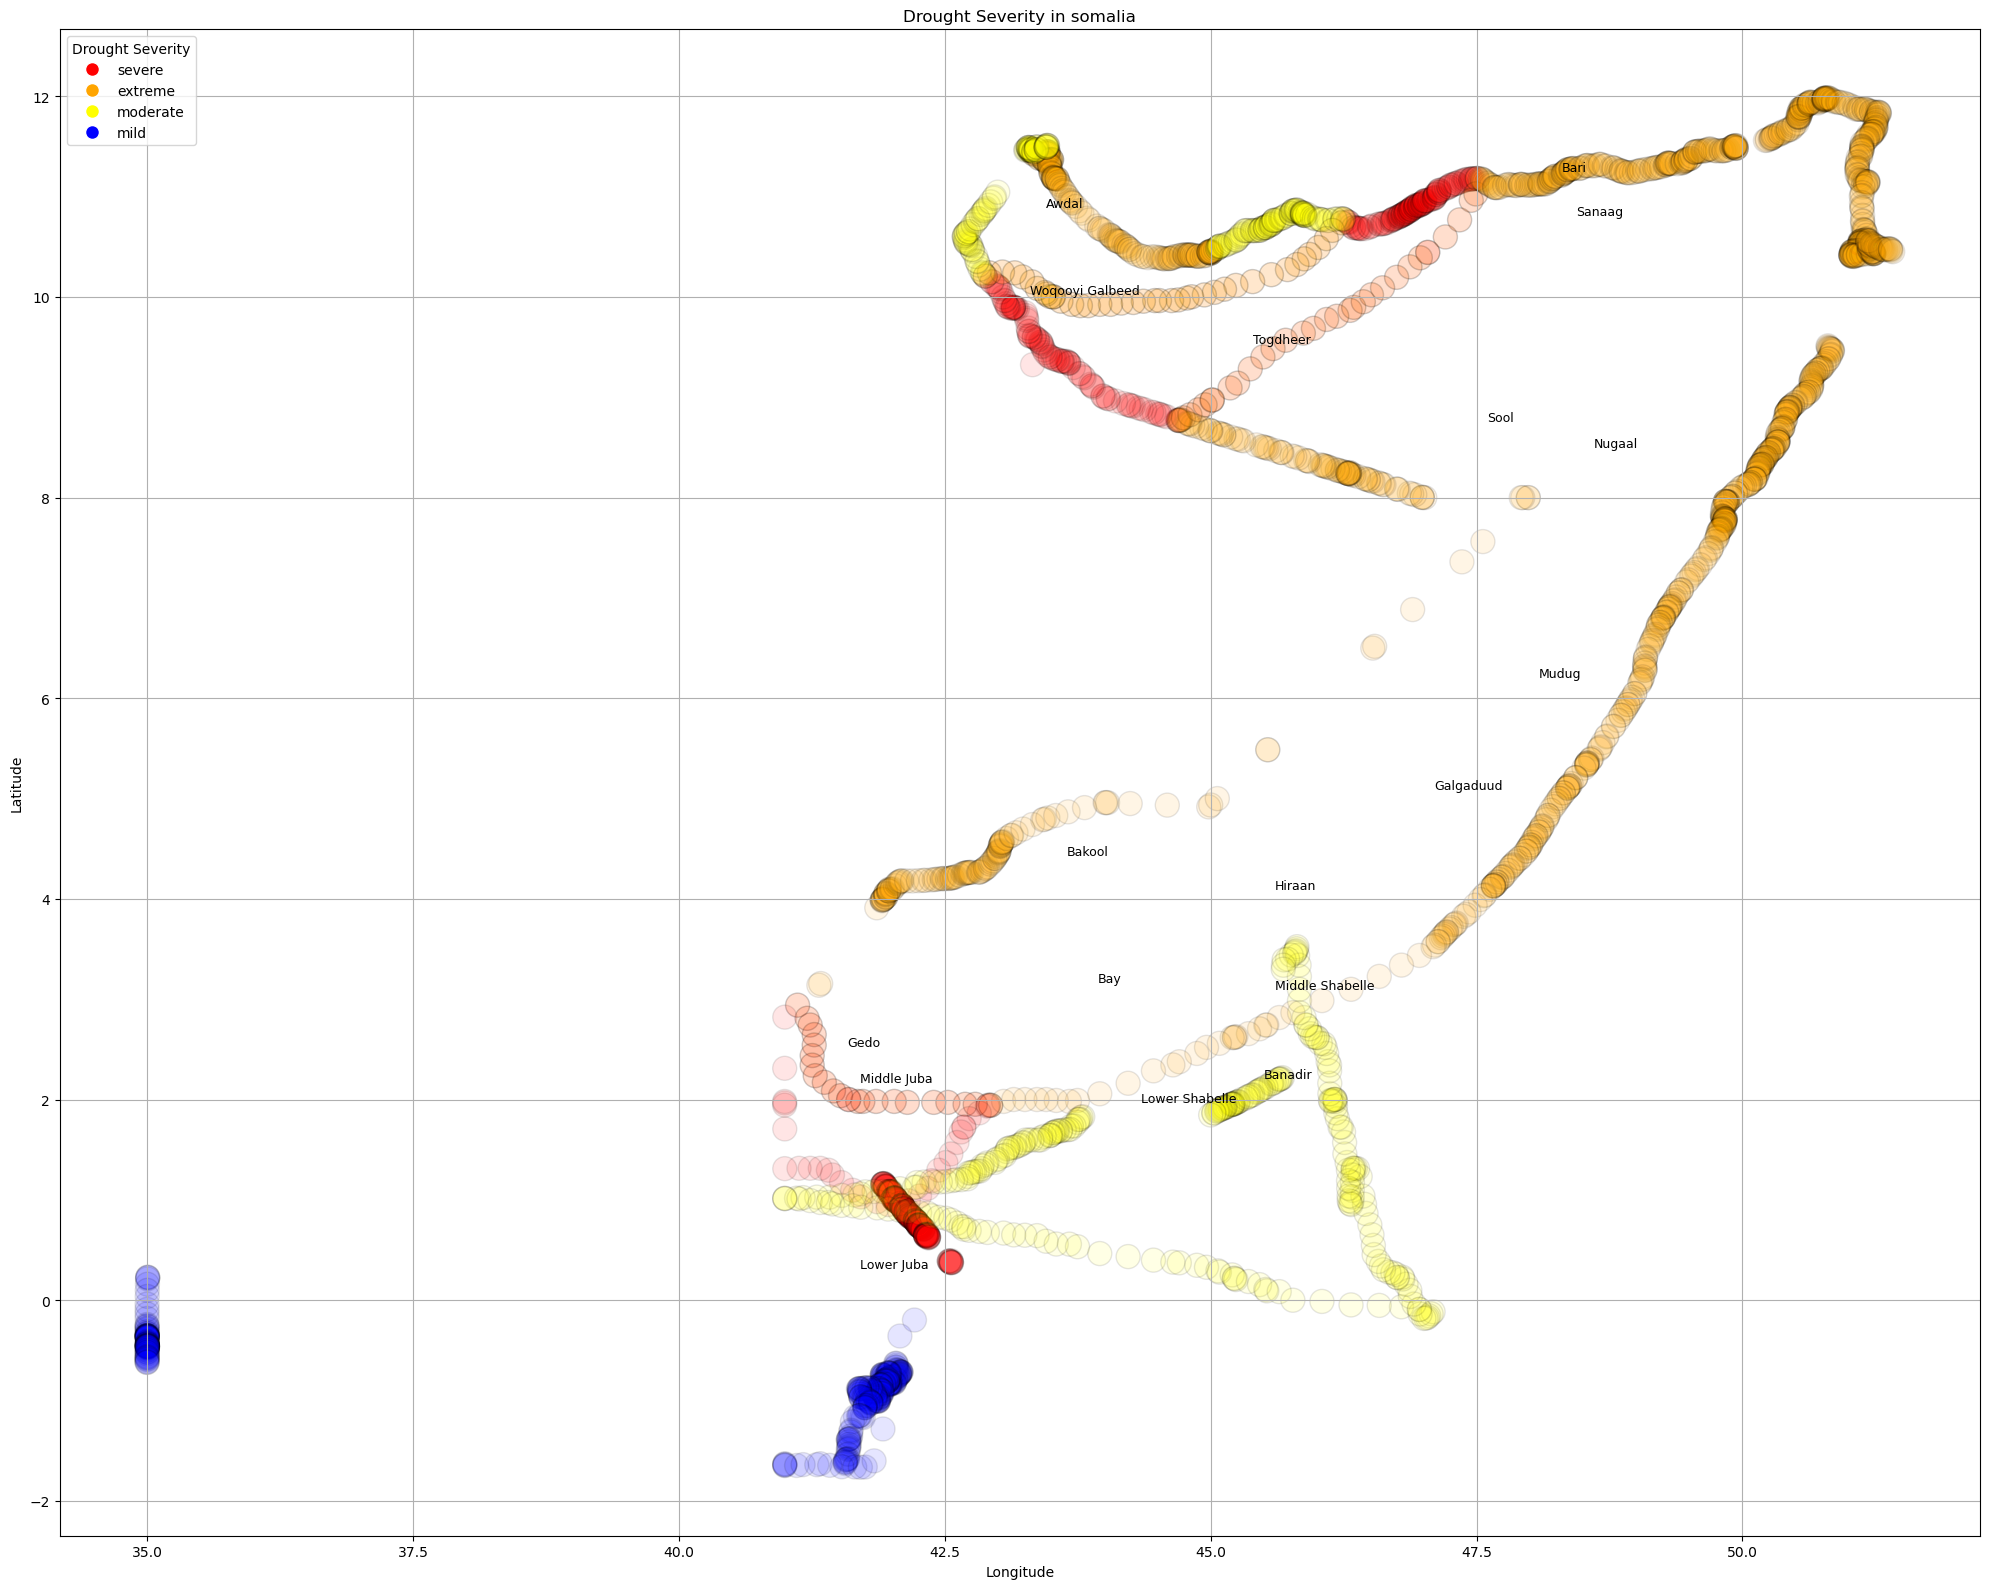

In [16]:
severity_colors = {
    'severe': 'red',
    'extreme': 'orange',
    'moderate': 'yellow',
    'mild': 'blue'
}

drought_df['color'] = drought_df['Drought'].map(severity_colors)

plt.figure(figsize=(20,16))
plt.scatter(drought_df['longitude'], drought_df['latitude'],
            c=drought_df['color'], s=300, alpha=0.1, edgecolors='black')


  

from matplotlib.lines import Line2D
legend_elements = [
   Line2D([0], [0], marker='o', color='w', label= 'severe', markerfacecolor='red', markersize=10),
   Line2D([0], [0], marker='o', color='w', label= 'extreme', markerfacecolor='orange', markersize=10),
   Line2D([0], [0], marker='o', color='w', label= 'moderate', markerfacecolor='yellow', markersize=10),
   Line2D([0], [0], marker='o', color='w', label= 'mild', markerfacecolor='blue', markersize=10),
]   
plt.legend(handles=legend_elements, title='Drought Severity')

for i, row in regions_df.iterrows():
    plt.text(row['Longitude'] + 0.1, row['Latitude'] + 0.1, row['Region'], fontsize=9)

plt.title('Drought Severity in somalia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()